In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymsm.datasets import load_aidssi, prep_aidssi, plot_aidssi
from pymsm.plotting import competingrisks_stackplot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



From Data Analysis with Competing Risks and Intermediate States, Book by Ronald B. Geskus: 

The data contains information on two event types, “AIDS” and “SI”, which compete to be the first to occur. 
Time is given in years since HIV infection. There are two different representations of the information on the event type that occurred first.  
In the cause column, the event type is described in words, whereas in the status column a numeric respresentation is used.  
The ccr5 column contains the information on the presence of the deletion CCR5-∆32. Individuals that don’t have the deletion have the value WW (W stands for “wild type”). Individuals that have the deletion on one of the chromosomes have the value WM (M stands for “mutation”)

See also: https://www.rdocumentation.org/packages/mstate/versions/0.3.1/topics/aidssi

In [17]:
data = load_aidssi()
data.head()

,patnr,time,status,cause,ccr5
1,1,9.106,1,AIDS,WW
2,2,11.039,0,event-free,WM
3,3,2.234,1,AIDS,WW
4,4,9.878,2,SI,WM
5,5,3.819,1,AIDS,WW


In [18]:
competing_risk_dataset, covariate_cols, state_labels = prep_aidssi(data)
competing_risk_dataset.head()

Index(['patnr', 'time', 'status', 'cause', 'ccr5_WW'], dtype='object')


,sample_id,time_entry_to_origin,origin_state,target_state,time_transition_to_target,ccr5_WW
0,1,0,1,2,9.106,1
1,2,0,1,0,11.039,0
2,3,0,1,2,2.234,1
3,4,0,1,3,9.878,0
4,5,0,1,2,3.819,1


In [19]:
plot_aidssi(competing_risk_dataset, state_labels)

/home/hagair/anaconda3/envs/pymsm/lib/python3.9/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/hagair/anaconda3/envs/pymsm/lib/python3.9/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)


<AxesSubplot:xlabel='t', ylabel='Probability'>

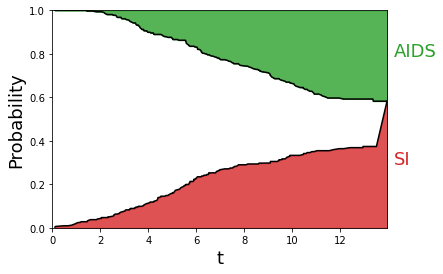

In [20]:
competingrisks_stackplot(
    data=competing_risk_dataset,
    duration_col='time_transition_to_target',
    event_col ='target_state',
    order_top= [2],
    order_bottom = [3],
    state_labels = state_labels)